In [1]:
from google.colab import files
uploaded = files.upload()


Saving img.jpg to img.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found. Please check the path.")

In [4]:
#brightness improvement
brightness_increase = cv2.convertScaleAbs(img, alpha=1, beta=50)

In [5]:
#brightness reduction
brightness_decrease = cv2.convertScaleAbs(img, alpha=1, beta=-50)

In [6]:
#thresholding
_, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

In [7]:
#negative of image
negative = 255 - img

In [8]:
#log transformation
img_float = img.astype(np.float32)
log_transformed = np.uint8(255 * (np.log1p(img_float) / np.log1p(np.max(img_float))))

In [9]:
#power-law transformation
gamma = 0.5
power_law = np.uint8(255 * ((img_float / 255) ** gamma))

In [10]:
#display results
titles = [
    'Original',
    'Brightness +',
    'Brightness -',
    'Thresholding',
    'Negative',
    'Log Transform',
    'Power Law (γ=0.5)'
]
images = [img, brightness_increase, brightness_decrease, thresholded, negative, log_transformed, power_law]

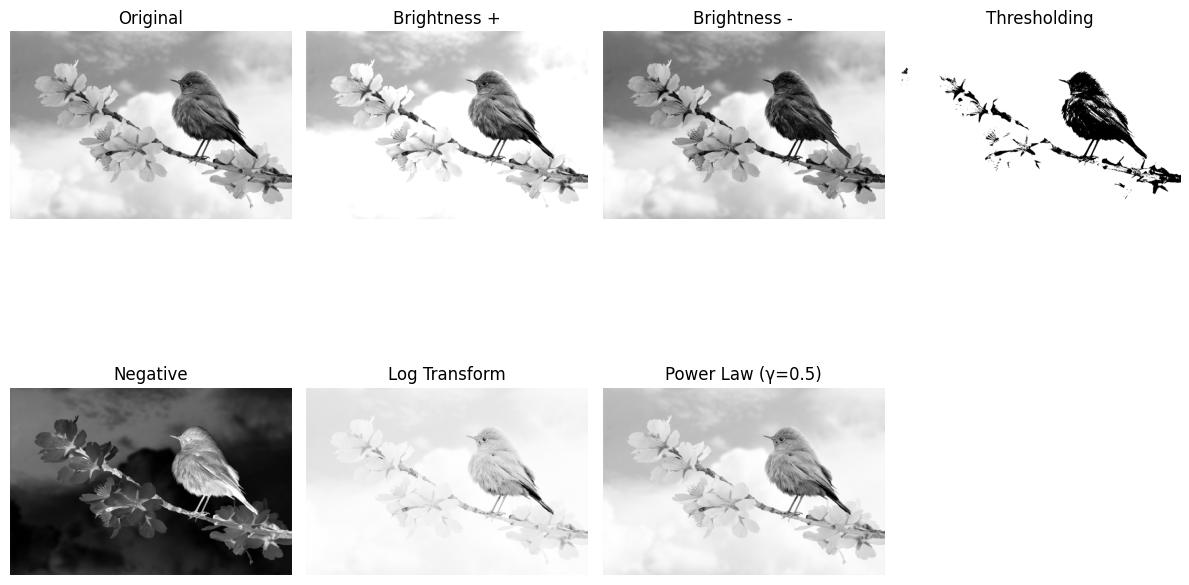

In [11]:
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()